In [9]:
import numpy as np
import pandas as pd

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)


In [11]:
df_sen_pro_act = pd.read_csv('senators_signed_pro_act.csv')
df_amazon = pd.read_csv('amazon_donations.csv')

In [12]:
df_sen_pro_act.head()

senators
0      Sen. Murray, Patricia [D-WA]
1  Sen. Schumer, Charles E. [D-NY]*
2  Sen. Blumenthal, Richard [D-CT]*
3     Sen. Duckworth, Tammy [D-IL]*
4      Sen. Booker, Cory A. [D-NJ]*

In [45]:
len(df_sen_pro_act)

47

In [119]:
df_sen_pro_act['last_name'] = df_sen_pro_act.senators.str.split('Sen. ', expand=True)[1].str.split(',', expand=True)[0].str.upper()
df_sen_pro_act.head()

senators   last_name first_name        senator_name
0      Sen. Murray, Patricia [D-WA]      MURRAY   PATRICIA     MURRAY PATRICIA
1  Sen. Schumer, Charles E. [D-NY]*     SCHUMER    CHARLES     SCHUMER CHARLES
2  Sen. Blumenthal, Richard [D-CT]*  BLUMENTHAL    RICHARD  BLUMENTHAL RICHARD
3     Sen. Duckworth, Tammy [D-IL]*   DUCKWORTH      TAMMY     DUCKWORTH TAMMY
4      Sen. Booker, Cory A. [D-NJ]*      BOOKER       CORY         BOOKER CORY

In [28]:
df_sen_pro_act['first_name'] = df_sen_pro_act.senators.str.split('Sen. ', expand=True)[1].str.split(',', expand=True)[1].str.split('[',expand=True)[0].str.upper()
df_sen_pro_act.head()

senators   last_name    first_name
0      Sen. Murray, Patricia [D-WA]      MURRAY     PATRICIA 
1  Sen. Schumer, Charles E. [D-NY]*     SCHUMER   CHARLES E. 
2  Sen. Blumenthal, Richard [D-CT]*  BLUMENTHAL      RICHARD 
3     Sen. Duckworth, Tammy [D-IL]*   DUCKWORTH        TAMMY 
4      Sen. Booker, Cory A. [D-NJ]*      BOOKER      CORY A.

In [36]:
df_sen_pro_act['first_name'] = df_sen_pro_act['first_name'].apply(lambda x: x.split()[0])
df_sen_pro_act.head()

senators   last_name first_name
0      Sen. Murray, Patricia [D-WA]      MURRAY   PATRICIA
1  Sen. Schumer, Charles E. [D-NY]*     SCHUMER    CHARLES
2  Sen. Blumenthal, Richard [D-CT]*  BLUMENTHAL    RICHARD
3     Sen. Duckworth, Tammy [D-IL]*   DUCKWORTH      TAMMY
4      Sen. Booker, Cory A. [D-NJ]*      BOOKER       CORY

In [15]:
df_amazon[['disbursement_amount', 'candidate_name', 'candidate_last_name', 'candidate_first_name', 'candidate_office']]

disbursement_amount                   candidate_name candidate_last_name  \
0               -5000.00                     LOFGREN, ZOE             LOFGREN   
1               -5000.00              ARMSTRONG, KELLY M.           ARMSTRONG   
2               -5000.00                              NaN                 NaN   
3               -5000.00                              NaN                 NaN   
4               -5000.00                              NaN                 NaN   
5               -5000.00                              NaN                 NaN   
6               -5000.00                              NaN                 NaN   
7               -5000.00                              NaN                 NaN   
8               -5000.00                              NaN                 NaN   
9               -5000.00                              NaN                 NaN   
10              -5000.00                              NaN                 NaN   
11              -3000.00       MCCAUL, MICHAEL THOMAS SR.              MCCAUL   
12              -2500.00               PALLONE, FRANK JR.             PALLONE   
13              -2500.00                  SHAHEEN, JEANNE             SHAHEEN   
14              -2500.00              SCOTT, DAVID ALBERT               SCOTT   
15              -2500.00         UPTON, FREDERICK STEPHEN               UPTON   
16              -2500.00            SMITH, CHRISTOPHER H.               SMITH   
17              -2500.00                     GRANGER, KAY             GRANGER   
18              -2500.00                 LATTA, ROBERT E.               LATTA   
19              -2500.00                GONZALES, TONY II            GONZALES   
20              -1500.00             JOYCE, DAVID PATRICK               JOYCE   
21              -1000.00               ESPAILLAT, ADRIANO           ESPAILLAT   
22              -1000.00                   WATERS, MAXINE              WATERS   
23              -1000.00             SOTO, DARREN MICHAEL                SOTO   
24              -1000.00                      JOYCE, JOHN               JOYCE   
25              -1000.00             JOYCE, DAVID PATRICK               JOYCE   
26              -1000.00                              NaN                 NaN   
27              -1000.00            MALONEY, SEAN PATRICK             MALONEY   
28              -1000.00                SMUCKER, LLOYD K.             SMUCKER   
29              -1000.00           DEUTCH, THEODORE ELIOT              DEUTCH   
30              -1000.00                PANETTA, JAMES V.             PANETTA   
31              -1000.00                              NaN                 NaN   
32              -1000.00              NORCROSS, DONALD W.            NORCROSS   
33              -1000.00        FORTENBERRY, JEFFREY LANE         FORTENBERRY   
34              -1000.00             GARBARINO, ANDREW R.           GARBARINO   
35              -1000.00               TAKANO, MARK ALLAN              TAKANO   
36              -1000.00                SCANLON, MARY GAY             SCANLON   
37                  0.82                              NaN                 NaN   
38                  2.50                              NaN                 NaN   
39                  6.84                              NaN                 NaN   
40                  7.86                              NaN                 NaN   
41                 14.90                              NaN                 NaN   
42                 21.52                              NaN                 NaN   
43                 23.03                              NaN                 NaN   
44                 29.20                              NaN                 NaN   
45                 30.04                              NaN                 NaN   
46                 30.47                              NaN                 NaN   
47                 31.93                              NaN                 NaN   
48                 32.74            

In [38]:
merged_df = df_amazon.merge(df_sen_pro_act.set_index(['last_name', 'first_name']), 
                      left_on=['candidate_last_name', 'candidate_first_name'], 
                      right_index=True, 
                      how='left')

In [39]:
merged_df

committee_id  \
0      C00360354   
1      C00360354   
2      C00360354   
3      C00360354   
4      C00360354   
5      C00360354   
6      C00360354   
7      C00360354   
8      C00360354   
9      C00360354   
10     C00360354   
11     C00360354   
12     C00360354   
13     C00360354   
14     C00360354   
15     C00360354   
16     C00360354   
17     C00360354   
18     C00360354   
19     C00360354   
20     C00360354   
21     C00360354   
22     C00360354   
23     C00360354   
24     C00360354   
25     C00360354   
26     C00360354   
27     C00360354   
28     C00360354   
29     C00360354   
30     C00360354   
31     C00360354   
32     C00360354   
33     C00360354   
34     C00360354   
35     C00360354   
36     C00360354   
37     C00360354   
38     C00360354   
39     C00360354   
40     C00360354   
41     C00360354   
42     C00360354   
43     C00360354   
44     C00360354   
45     C00360354   
46     C00360354   
47     C00360354   
48     C00360354   
49     C00360354   
50     C00360354   
51     C00360354   
52     C00360354   
53     C00360354   
54     C00360354   
55     C00360354   
56     C00360354   
57     C00360354   
58     C00360354   
59     C00360354   
60     C00360354   
61     C00360354   
62     C00360354   
63     C00360354   
64     C00360354   
65     C00360354   
66     C00360354   
67     C00360354   
68     C00360354   
69     C00360354   
70     C00360354   
71     C00360354   
72     C00360354   
73     C00360354   
74     C00360354   
75     C00360354   
76     C00360354   
77     C00360354   
78     C00360354   
79     C00360354   
80     C00360354   
81     C00360354   
82     C00360354   
83     C00360354   
84     C00360354   
85     C00360354   
86     C00360354   
87     C00360354   
88     C00360354   
89     C00360354   
90     C00360354   
91     C00360354   
92     C00360354   
93     C00360354   
94     C00360354   
95     C00360354   
96     C00360354   
97     C00360354   
98     C00360354   
99     C00360354   
100    C00360354   
101    C00360354   
102    C00360354   
103    C00360354   
104    C00360354   
105    C00360354   
106    C00360354   
107    C00360354   
108    C00360354   
109    C00360354   
110    C00360354   
111    C00360354   
112    C00360354   
113    C00360354   
114    C00360354   
115    C00360354   
116    C00360354   
117    C00360354   
118    C00360354   
119    C00360354   
120    C00360354   
121    C00360354   
122    C00360354   
123    C00360354   
124    C00360354   
125    C00360354   
126    C00360354   
127    C00360354   
128    C00360354   
129    C00360354   
130    C00360354   
131    C00360354   
132    C00360354   
133    C00360354   
134    C00360354   
135    C00360354   
136    C00360354   
137    C00360354   
138    C00360354   
139    C00360354   
140    C00360354   
141    C00360354   
142    C00360354   
143    C00360354   
144    C00360354   
145    C00360354   
146    C00360354   
147    C00360354   
148    C00360354   
149    C00360354   
150    C00360354   
151    C00360354   
152    C00360354   
153    C00360354   
154    C00360354   
155    C00360354   
156    C00360354   
157    C00360354   
158    C00360354   
159    C00360354   
160    C00360354   
161    C00360354   
162    C00360354   
163    C00360354   
164    C00360354   
165    C00360354   
166    C00360354   
167    C00360354   
168    C00360354   
169    C00360354   
170    C00360354   
171    C00360354   
172    C00360354   
173    C00360354   
174    C00360354   
175    C00360354   
176    C00360354   
177    C00360354   
178    C00360354   
179    C00360354   
180    C00360354   
181    C00360354   
182    C00360354   
183    C00360354   
184    C00360354   
185    C00360354   
186    C00360354   
187    C00360354   
188    C00360354   
189    C00360354   
190    C00360354   
191    C00360354   
192    C00360354   
193    C00360354   
194    C00360354   
195    C00360354   
196    C00360354   
197    C00360354   
198    C00360354   
199 

In [56]:
merged_df_1 = merged_df[merged_df['senators'].notna()]
sen_pro_act_and_amazon_money = merged_df_1[['disbursement_amount', 'candidate_name', 'candidate_last_name', 'candidate_first_name', 'candidate_office', 'senators']]

In [57]:
len(sen_pro_act_and_amazon_money)

27

In [105]:
sen_pro_act_and_amazon_money = sen_pro_act_and_amazon_money.groupby('senators').sum('disbursement_amount').sort_values(by='disbursement_amount', ascending=True).reset_index()

In [106]:
sen_pro_act_and_amazon_money

senators  disbursement_amount
0           Sen. Shaheen, Jeanne [D-NH]*              -2500.0
1          Sen. Heinrich, Martin [D-NM]*               2500.0
2         Sen. Leahy, Patrick J. [D-VT]*               2500.0
3       Sen. Schumer, Charles E. [D-NY]*               2500.0
4            Sen. Baldwin, Tammy [D-WI]*               5000.0
5         Sen. Carper, Thomas R. [D-DE]*               5000.0
6     Sen. Coons, Christopher A. [D-DE]*               5000.0
7                Sen. Reed, Jack [D-RI]*               5000.0
8              Sen. Rosen, Jacky [D-NV]*               5000.0
9             Sen. Schatz, Brian [D-HI]*               6000.0
10          Sen. Murray, Patricia [D-WA]               7000.0
11          Sen. Peters, Gary C. [D-MI]*               7500.0
12  Sen. Cortez Masto, Catherine [D-NV]*              10000.0
13    Sen. Hassan, Margaret Wood [D-NH]*              10000.0
14               Sen. Wyden, Ron [D-OR]*              10000.0

In [129]:
duckworth = pd.DataFrame({'senators': ['Sen. Duckworth, Tammy [D-IL]*'], 'disbursement_amount': ['7500.0']})

# concatenate the two dataframes along the axis=0
sen_pro_act_and_amazon_money_2 = pd.concat([sen_pro_act_and_amazon_money, duckworth], axis=0, ignore_index=True)

sen_pro_act_and_amazon_money = sen_pro_act_and_amazon_money_2
sen_pro_act_and_amazon_money

senators disbursement_amount
0           Sen. Shaheen, Jeanne [D-NH]*             -2500.0
1          Sen. Heinrich, Martin [D-NM]*              2500.0
2         Sen. Leahy, Patrick J. [D-VT]*              2500.0
3       Sen. Schumer, Charles E. [D-NY]*              2500.0
4            Sen. Baldwin, Tammy [D-WI]*              5000.0
5         Sen. Carper, Thomas R. [D-DE]*              5000.0
6     Sen. Coons, Christopher A. [D-DE]*              5000.0
7                Sen. Reed, Jack [D-RI]*              5000.0
8              Sen. Rosen, Jacky [D-NV]*              5000.0
9             Sen. Schatz, Brian [D-HI]*              6000.0
10          Sen. Murray, Patricia [D-WA]              7000.0
11          Sen. Peters, Gary C. [D-MI]*              7500.0
12  Sen. Cortez Masto, Catherine [D-NV]*             10000.0
13    Sen. Hassan, Margaret Wood [D-NH]*             10000.0
14               Sen. Wyden, Ron [D-OR]*             10000.0
15         Sen. Duckworth, Tammy [D-IL]*              7500.0
16         Sen. Duckworth, Tammy [D-IL]*              7500.0

In [130]:
sen_pro_act_and_amazon_money['disbursement_amount'] = sen_pro_act_and_amazon_money['disbursement_amount'].astype(float)

array([[<AxesSubplot:title={'center':'disbursement_amount'}>]],
      dtype=object)

/Users/rachelp/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rachelp/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rachelp/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rachelp/.pyenv/versions/3.11.0rc2/lib/python3.

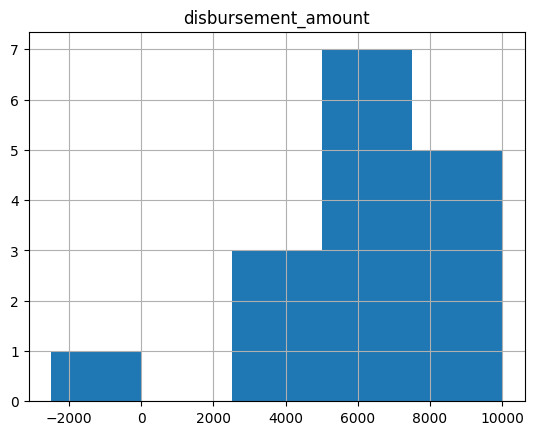

In [117]:
sen_pro_act_and_amazon_money.hist(column='disbursement_amount', bins=5)

In [131]:
sen_pro_act_and_amazon_money.to_csv('sen_pro_act_and_amazon_money.csv', index=False)

In [132]:
import os

directory = '/Users/rachelp/Downloads/lawmakers_pro_act_amazon_money'
file_list = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

In [133]:
amazon_data = pd.DataFrame()

In [134]:
for file_name in file_list:
    data = pd.read_csv(file_name)
    amazon_data = pd.concat([amazon_data, data], ignore_index=True)

In [135]:
amazon_data.to_csv('amazon_data.csv', index=False)